# Data import

In [118]:
import pandas as pd

#load data
data = pd.read_csv("ADEME-CarLabelling.csv", delimiter=";", decimal=",")

In [119]:
#Aperçu des données : columns
datatypes = data.dtypes 
print(datatypes)


Marque                            object
Libellé modèle                    object
Modèle                            object
Groupe                            object
Description Commerciale           object
Energie                           object
Carrosserie                       object
Cylindrée                          int64
Gamme                             object
Puissance fiscale                  int64
Puissance maximale               float64
Puissance nominale électrique    float64
Poids à vide                       int64
Rapport poids-puissance          float64
Type de boite                     object
Nombre rapports                    int64
Conso basse vitesse Min          float64
Conso basse vitesse Max          float64
Conso moyenne vitesse Min        float64
Conso moyenne vitesse Max        float64
Conso haute vitesse Min          float64
Conso haute vitesse Max          float64
Conso T-haute vitesse Min        float64
Conso T-haute vitesse Max        float64
Conso vitesse mi

In [120]:
#Aperçu des données
data.head(10)

,Marque,Libellé modèle,Modèle,Groupe,Description Commerciale,Energie,Carrosserie,Cylindrée,Gamme,Puissance fiscale,...,Essai CO2 type 1,Essai HC,Essai Nox,Essai HCNox,Essai particules,Masse OM Min,Masse OM Max,Bonus-Malus,Barème Bonus-Malus,Prix véhicule
0,RENAULT,KANGOO,KANGOO,RENAULT,KANGOO (130ch),ESSENCE,COMBISPACE,1332,INFERIEURE,7,...,0.234,0.012,0.022,NaN,0.001,1594,1594,Malus,1901.0,31000
1,MAZDA,MX-30,MX-30,AUTRES,MX-30 E-SKYACTIV (145ch),ELECTRIC,TS TERRAINS/CHEMINS,0,INFERIEURE,6,...,NaN,NaN,NaN,NaN,NaN,1720,1720,Bonus 6000,-6000.0,38510
2,DS,DS 7 CROSSBACK,7 CROSSBACK,STELLANTIS,DS7 CROSSBACK e-tense 4x2 (225ch),ELEC+ESSENC HR,TS TERRAINS/CHEMINS,1598,MOYENNE SUPERIEURE,10,...,0.460,0.015,0.016,NaN,0.001,1835,1835,Neutre 0,NaN,57560
3,RENAULT,AUSTRAL,AUSTRAL,RENAULT,AUSTRAL (130ch+0Kw),ESS+ELEC HNR,TS TERRAINS/CHEMINS,1199,MOYENNE SUPERIEURE,7,...,0.439,0.024,0.018,NaN,0.000,1496,1496,Neutre 0,11900.0,33000
4,B.M.W.,SERIE 2,218,AUTRES,218i Active Tourer,ESSENCE,MONOSPACE COMPACT,1499,MOYENNE INFERIEURE,7,...,0.204,0.007,0.009,NaN,0.000,1545,1545,Malus,400.0,36688
5,RENAULT,KADJAR,KADJAR,RENAULT,KADJAR (140ch),ESSENCE,TS TERRAINS/CHEMINS,1332,MOYENNE SUPERIEURE,7,...,0.162,0.015,0.013,NaN,0.000,1428,1428,Malus,740.0,33500
6,SKODA,OCTAVIA,OCTAVIA,VGF,OCTAVIA Berline 2.0 TDI (150ch) DSG7,GAZOLE,BERLINE,1968,MOYENNE SUPERIEURE,8,...,0.026,NaN,0.028,0.037,0.000,1461,1461,Neutre 0,NaN,35218
7,B.M.W.,SERIE X,X5,AUTRES,X5 xDrive30d,GAZ+ELEC HNR,TS TERRAINS/CHEMINS,2993,LUXE,17,...,0.141,NaN,0.045,0.063,0.001,2265,2265,Malus,16610.0,79017
8,JEEP,COMPASS,COMPASS,STELLANTIS,1.3 GSE PHEV (240ch) AT6 4xe Trailhawk/S,ELEC+ESSENC HR,TS TERRAINS/CHEMINS,1332,MOYENNE SUPERIEURE,10,...,0.326,0.033,0.019,NaN,0.000,1935,1935,Neutre 0,NaN,50100
9,RENAULT,ARKANA E-TECH,ARKANA,RENAULT,ARKANA (94ch+24Kw),ESS+ELEC HNR,TS TERRAINS/CHEMINS,1598,MOYENNE INFERIEURE,5,...,0.383,0.020,0.003,NaN,NaN,1510,1510,Neutre 0,11900.0,35656


# Data preprocessing

## Missing values

In [121]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

Conso elec Min                   6861
Autonomie elec urbain Min        6861
Autonomie elec Min               6861
Autonomie elec urbain Max        6779
Autonomie elec Max               6779
Conso elec Max                   6779
Puissance nominale électrique    4925
Essai HCNox                      4666
Essai HC                         3039
Barème Bonus-Malus               1410
CO2 haute vitesse Min             989
Conso haute vitesse Min           989
CO2 T-haute vitesse Min           989
CO2 moyenne vitesse Min           989
Conso moyenne vitesse Min         989
CO2 basse vitesse Min             989
Conso T-haute vitesse Min         989
Conso basse vitesse Min           989
Conso moyenne vitesse Max         900
Conso haute vitesse Max           900
Conso basse vitesse Max           900
CO2 basse vitesse Max             900
CO2 moyenne vitesse Max           900
CO2 haute vitesse Max             900
Conso T-haute vitesse Max         900
CO2 T-haute vitesse Max           900
Essai partic

In [122]:
#On remplace les valeurs manquants des voitures non electriques par -1

elec_cars_cols = [
    "Conso elec Min",
    "Conso elec Max",
    "Autonomie elec urbain Min",
    "Autonomie elec urbain Max",
    "Autonomie elec Min",
    "Autonomie elec Max",
    "Puissance nominale électrique"
]

for column in elec_cars_cols:
    if column in data.columns:
        data[column].fillna(-1, inplace=True)


In [123]:
#On remplace les valeurs nulles des Essais par -1

essais_cols = [
    "Essai HCNox",
    "Essai HC",
    "Essai particules",
    "Essai CO2 type 1",
    "Essai Nox"
]

for column in essais_cols:
    if column in data.columns:
        data[column].fillna(-1, inplace=True)
    

In [124]:
#Merge col min max et delete les lignes sans info (environ 900)

columns_pairs_to_merge = [
    ("Conso basse vitesse Min", "Conso basse vitesse Max"),
    ("Conso moyenne vitesse Min", "Conso moyenne vitesse Max"),
    ("Conso haute vitesse Min", "Conso haute vitesse Max"),
    ("Conso T-haute vitesse Min", "Conso T-haute vitesse Max"),
    ("Conso vitesse mixte Min", "Conso vitesse mixte Max"),
    ("Conso elec Min", "Conso elec Max"),
    ("CO2 basse vitesse Min", "CO2 basse vitesse Max"),
    ("CO2 moyenne vitesse Min", "CO2 moyenne vitesse Max"),
    ("CO2 haute vitesse Min", "CO2 haute vitesse Max"),
    ("CO2 T-haute vitesse Min", "CO2 T-haute vitesse Max"),
    ("CO2 vitesse mixte Min", "CO2 vitesse mixte Max")
]

for min_col, max_col in columns_pairs_to_merge:
    data.drop(data[data[min_col].isnull() | data[max_col].isnull()].index, inplace=True)

data.reset_index(drop=True, inplace=True)

for min_col, max_col in columns_pairs_to_merge:
    if min_col in data.columns and max_col in data.columns:
        avg_column = min_col.replace(" Min", " Avg")
        data[avg_column] = (data[min_col] + data[max_col]) / 2

# Drop the min and max columns if they exist
for min_col, max_col in columns_pairs_to_merge:
    if min_col in data.columns:
        data.drop(min_col, axis=1, inplace=True)
    if max_col in data.columns:
        data.drop(max_col, axis=1, inplace=True)


In [125]:
data["Barème Bonus-Malus"].fillna(-1, inplace=True)

In [126]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [127]:
data.head(15)

,Marque,Libellé modèle,Modèle,Groupe,Description Commerciale,Energie,Carrosserie,Cylindrée,Gamme,Puissance fiscale,...,Conso moyenne vitesse Avg,Conso haute vitesse Avg,Conso T-haute vitesse Avg,Conso vitesse mixte Avg,Conso elec Avg,CO2 basse vitesse Avg,CO2 moyenne vitesse Avg,CO2 haute vitesse Avg,CO2 T-haute vitesse Avg,CO2 vitesse mixte Avg
0,RENAULT,KANGOO,KANGOO,RENAULT,KANGOO (130ch),ESSENCE,COMBISPACE,1332,INFERIEURE,7,...,6.7880,6.1880,7.9175,7.2635,-1.0,198.195,153.835,140.195,179.495,164.640
1,RENAULT,AUSTRAL,AUSTRAL,RENAULT,AUSTRAL (130ch+0Kw),ESS+ELEC HNR,TS TERRAINS/CHEMINS,1199,MOYENNE SUPERIEURE,7,...,5.0200,4.8340,5.9555,5.5025,-1.0,148.090,113.575,109.335,134.925,124.440
2,B.M.W.,SERIE 2,218,AUTRES,218i Active Tourer,ESSENCE,MONOSPACE COMPACT,1499,MOYENNE INFERIEURE,7,...,6.6295,5.6370,6.4505,6.5680,-1.0,203.650,150.895,128.260,146.825,149.500
3,RENAULT,KADJAR,KADJAR,RENAULT,KADJAR (140ch),ESSENCE,TS TERRAINS/CHEMINS,1332,MOYENNE SUPERIEURE,7,...,6.1940,5.5790,6.8490,6.4715,-1.0,180.205,140.210,126.255,155.055,146.500
4,SKODA,OCTAVIA,OCTAVIA,VGF,OCTAVIA Berline 2.0 TDI (150ch) DSG7,GAZOLE,BERLINE,1968,MOYENNE SUPERIEURE,8,...,4.6525,4.0510,4.7225,4.7140,-1.0,165.695,121.995,106.210,123.830,123.600
5,B.M.W.,SERIE X,X5,AUTRES,X5 xDrive30d,GAZ+ELEC HNR,TS TERRAINS/CHEMINS,2993,LUXE,17,...,6.7700,6.1015,7.2095,6.9970,-1.0,231.775,177.200,159.680,188.710,183.150
6,RENAULT,ARKANA E-TECH,ARKANA,RENAULT,ARKANA (94ch+24Kw),ESS+ELEC HNR,TS TERRAINS/CHEMINS,1598,MOYENNE INFERIEURE,5,...,4.3220,4.3585,5.7415,4.9190,-1.0,111.625,97.650,98.465,129.895,111.200
7,RENAULT,ARKANA,ARKANA,RENAULT,ARKANA (140ch+0Kw),ESS+ELEC HNR,TS TERRAINS/CHEMINS,1332,MOYENNE INFERIEURE,7,...,5.7940,5.0395,6.1205,5.9245,-1.0,173.375,131.165,114.015,138.570,134.125
8,MINI,MINI,CLUBMAN,B.M.W.,MINI Cooper Clubman (F54),ESSENCE,BREAK,1499,INFERIEURE,7,...,6.1705,5.4435,6.2465,6.2485,-1.0,187.520,140.375,123.785,142.095,142.150
9,NISSAN,QASHQAI,QASHQAI,NISSAN,Mild Hybrid (158ch) Xtronic i-4x4 N-CONNECTA,ESS+ELEC HNR,TS TERRAINS/CHEMINS,1332,MOYENNE SUPERIEURE,8,...,6.7555,6.0335,7.4135,7.0670,-1.0,203.625,152.435,136.095,167.335,159.500


In [128]:
file_path = "Preprocessed_data.csv"
data.to_csv(file_path, index=False)

# EDA

## Cols

In [129]:
summary = data.describe(include='all')
summary

,Marque,Libellé modèle,Modèle,Groupe,Description Commerciale,Energie,Carrosserie,Cylindrée,Gamme,Puissance fiscale,...,Conso moyenne vitesse Avg,Conso haute vitesse Avg,Conso T-haute vitesse Avg,Conso vitesse mixte Avg,Conso elec Avg,CO2 basse vitesse Avg,CO2 moyenne vitesse Avg,CO2 haute vitesse Avg,CO2 T-haute vitesse Avg,CO2 vitesse mixte Avg
count,6690,6690,6690,6690,6690,6690,6690,6690.000000,6690,6690.000000,...,6690.000000,6690.000000,6690.000000,6690.000000,6690.0,6690.000000,6690.000000,6690.000000,6690.000000,6690.000000
unique,33,213,238,12,1105,7,10,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B.M.W.,SERIE X,118,AUTRES,118i,ESSENCE,TS TERRAINS/CHEMINS,NaN,INFERIEURE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1638,526,187,2530,114,2664,2419,NaN,1918,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1757.568161,NaN,9.566517,...,6.075571,5.407636,6.464161,6.266208,-1.0,192.243786,145.867622,129.746289,155.067106,150.332721
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,563.018675,NaN,6.498144,...,1.254111,1.027638,1.135738,1.223853,0.0,51.072821,29.573534,24.084541,26.497124,28.393897
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,988.000000,NaN,4.000000,...,3.327000,3.726000,4.238500,4.343500,-1.0,72.835000,75.275000,88.325000,105.540000,98.360000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1461.000000,NaN,6.000000,...,5.213500,4.709000,5.655000,5.421500,-1.0,162.845000,126.740000,114.185000,137.175000,132.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1598.000000,NaN,8.000000,...,5.912500,5.267500,6.296000,6.110000,-1.0,183.850000,139.692500,123.710000,146.447500,143.600000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.000000,NaN,10.000000,...,6.675500,5.840500,7.025000,6.840000,-1.0,209.405000,155.700000,137.550000,165.045000,160.260000


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

## Type d'énergie

C:\Users\Hugo\AppData\Local\Temp\ipykernel_11844\837597270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Energie', order=data['Energie'].value_counts().index, palette='viridis')


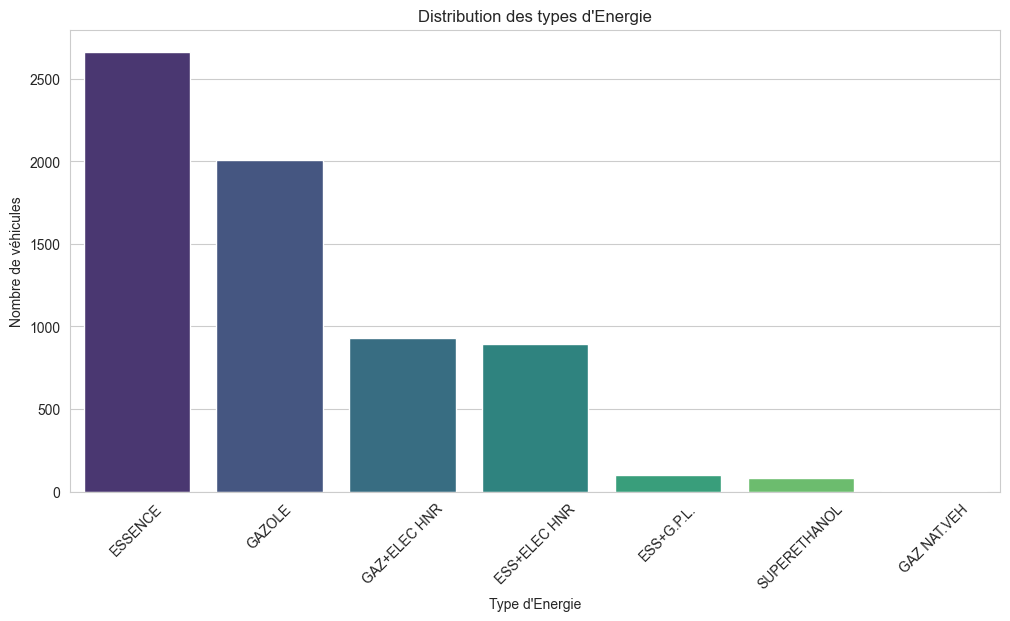

In [131]:
# Visualisation de la distribution des types d'énergie
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Energie', order=data['Energie'].value_counts().index, palette='viridis')
plt.title('Distribution des types d\'Energie')
plt.xlabel('Type d\'Energie')
plt.ylabel('Nombre de véhicules')
plt.xticks(rotation=45)
plt.show()


C:\Users\Hugo\AppData\Local\Temp\ipykernel_11844\2485639845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Marque', order=data['Marque'].value_counts().index, palette='viridis')


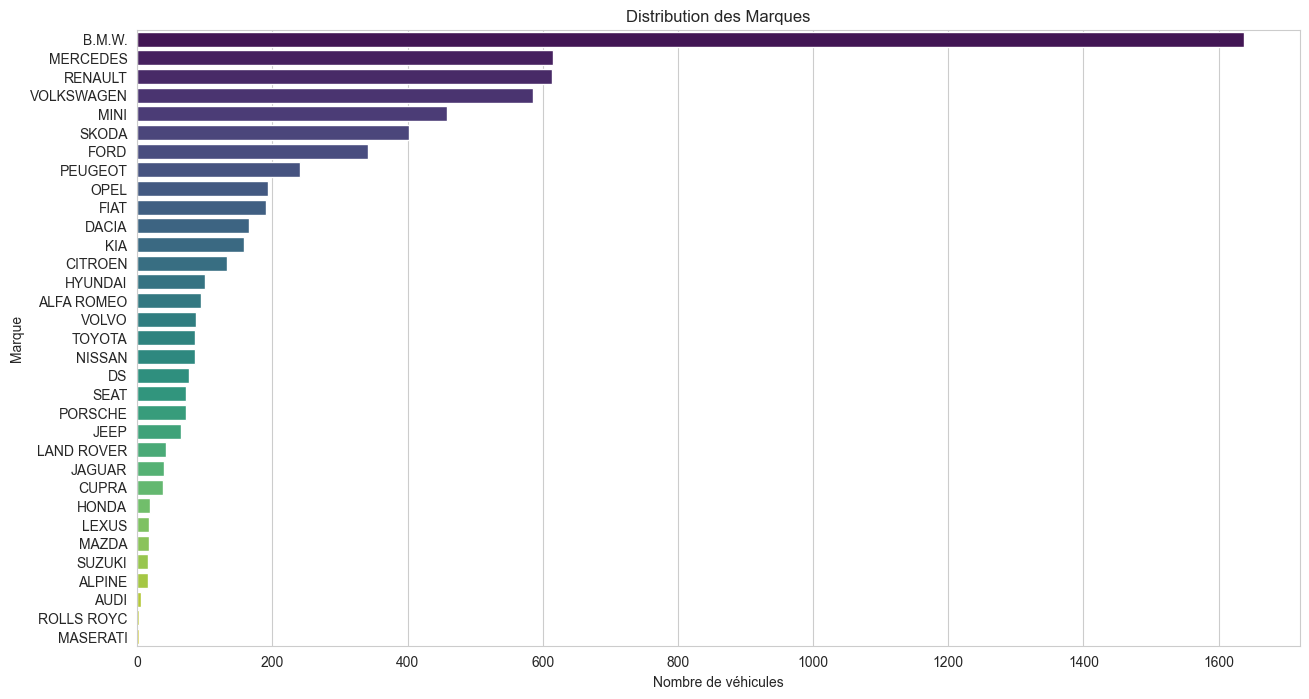

In [132]:
# Visualisation de la distribution des marques
plt.figure(figsize=(15, 8))
sns.countplot(data=data, y='Marque', order=data['Marque'].value_counts().index, palette='viridis')
plt.title('Distribution des Marques')
plt.xlabel('Nombre de véhicules')
plt.ylabel('Marque')
plt.show()


## Autour de la puissance du véhicule

C:\Users\Hugo\AppData\Local\Temp\ipykernel_11844\335447033.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Variables de Puissance', y='Valeur', data=melted_data, palette="viridis")


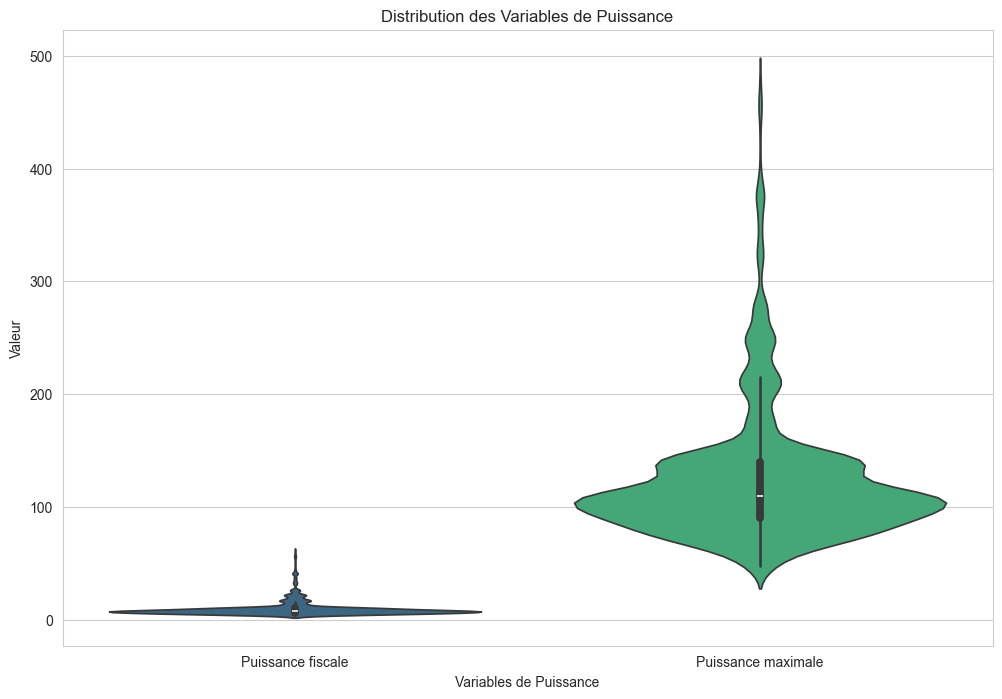

In [133]:
# Préparation des données pour le violin plot
melted_data = data.melt(value_vars=['Puissance fiscale', 'Puissance maximale'], 
                        var_name='Variables de Puissance', value_name='Valeur')

# Création du violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Variables de Puissance', y='Valeur', data=melted_data, palette="viridis")
plt.title('Distribution des Variables de Puissance')
plt.ylabel('Valeur')
plt.xlabel('Variables de Puissance')
plt.show()


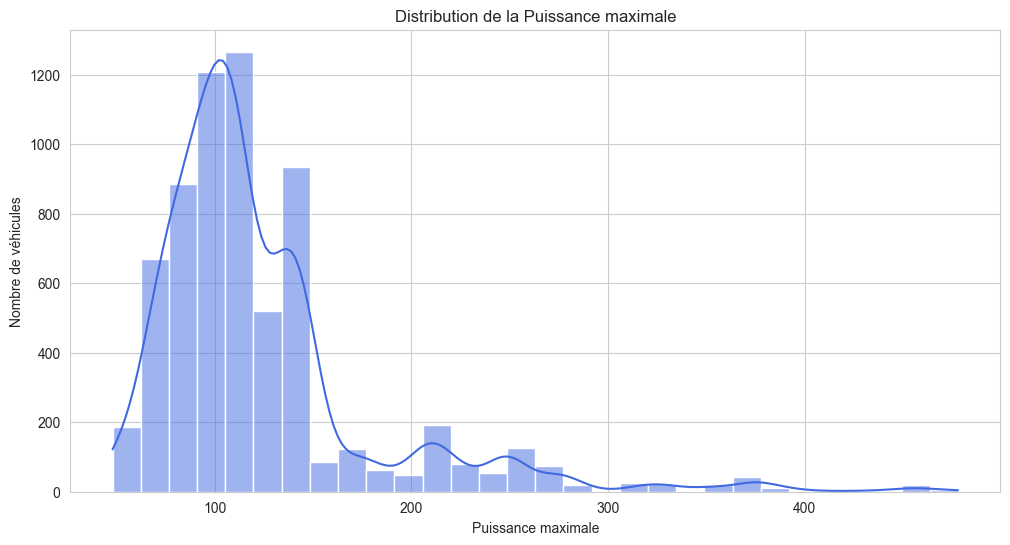

In [134]:
# Visualisation de la distribution de la Puissance maximale
plt.figure(figsize=(12, 6))
sns.histplot(data['Puissance maximale'], bins=30, kde=True, color='royalblue')
plt.title('Distribution de la Puissance maximale')
plt.xlabel('Puissance maximale')
plt.ylabel('Nombre de véhicules')
plt.show()


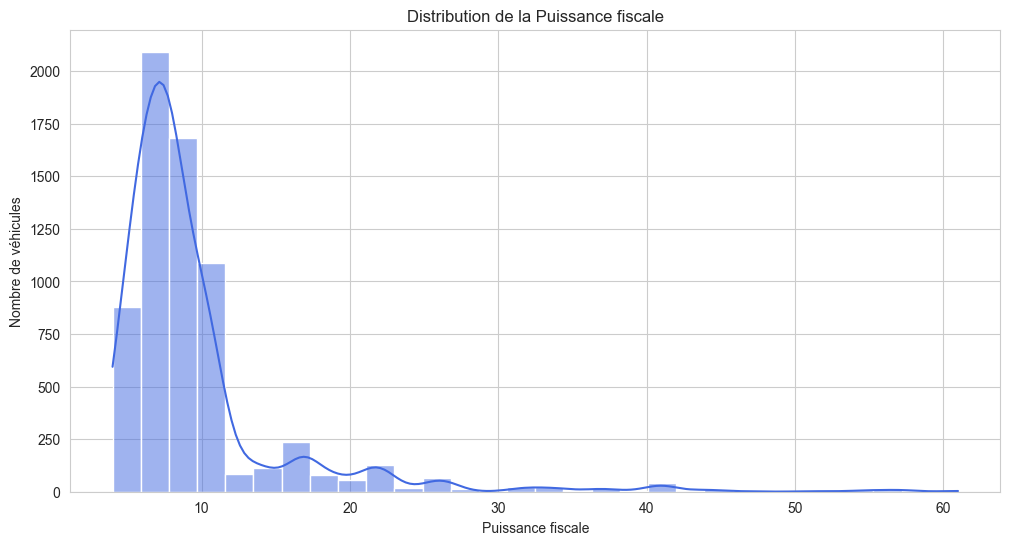

In [135]:
# Visualisation de la distribution de la Puissance fiscale
plt.figure(figsize=(12, 6))
sns.histplot(data['Puissance fiscale'], bins=30, kde=True, color='royalblue')
plt.title('Distribution de la Puissance fiscale')
plt.xlabel('Puissance fiscale')
plt.ylabel('Nombre de véhicules')
plt.show()


## Autour des émissions de CO2

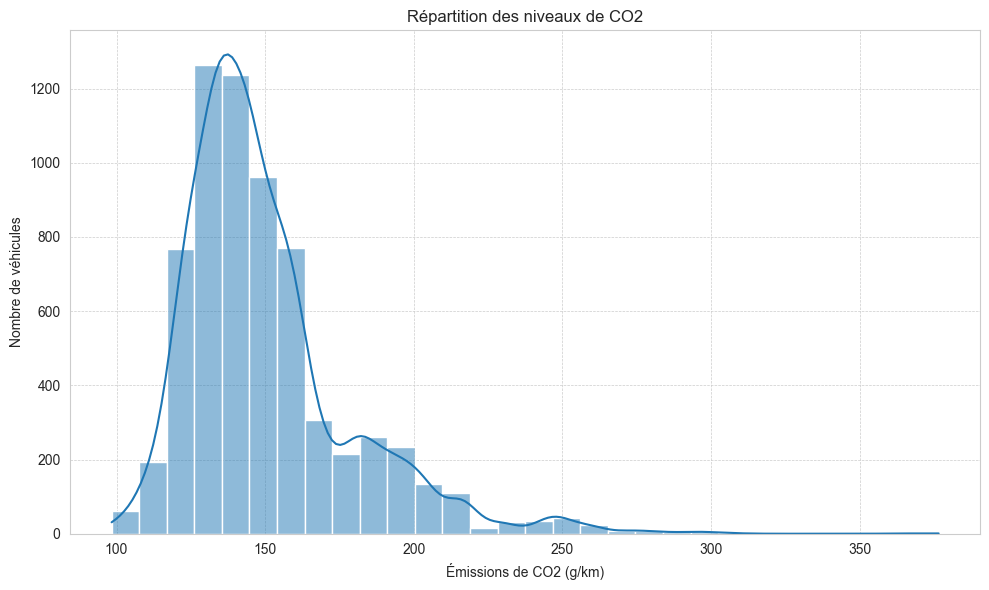

In [142]:
# Plot histogram for CO2 emissions
plt.figure(figsize=(10, 6))
sns.histplot(data['CO2 vitesse mixte Avg'], bins=30, kde=True)
plt.title('Répartition des niveaux de CO2')
plt.xlabel('Émissions de CO2 (g/km)')
plt.ylabel('Nombre de véhicules')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


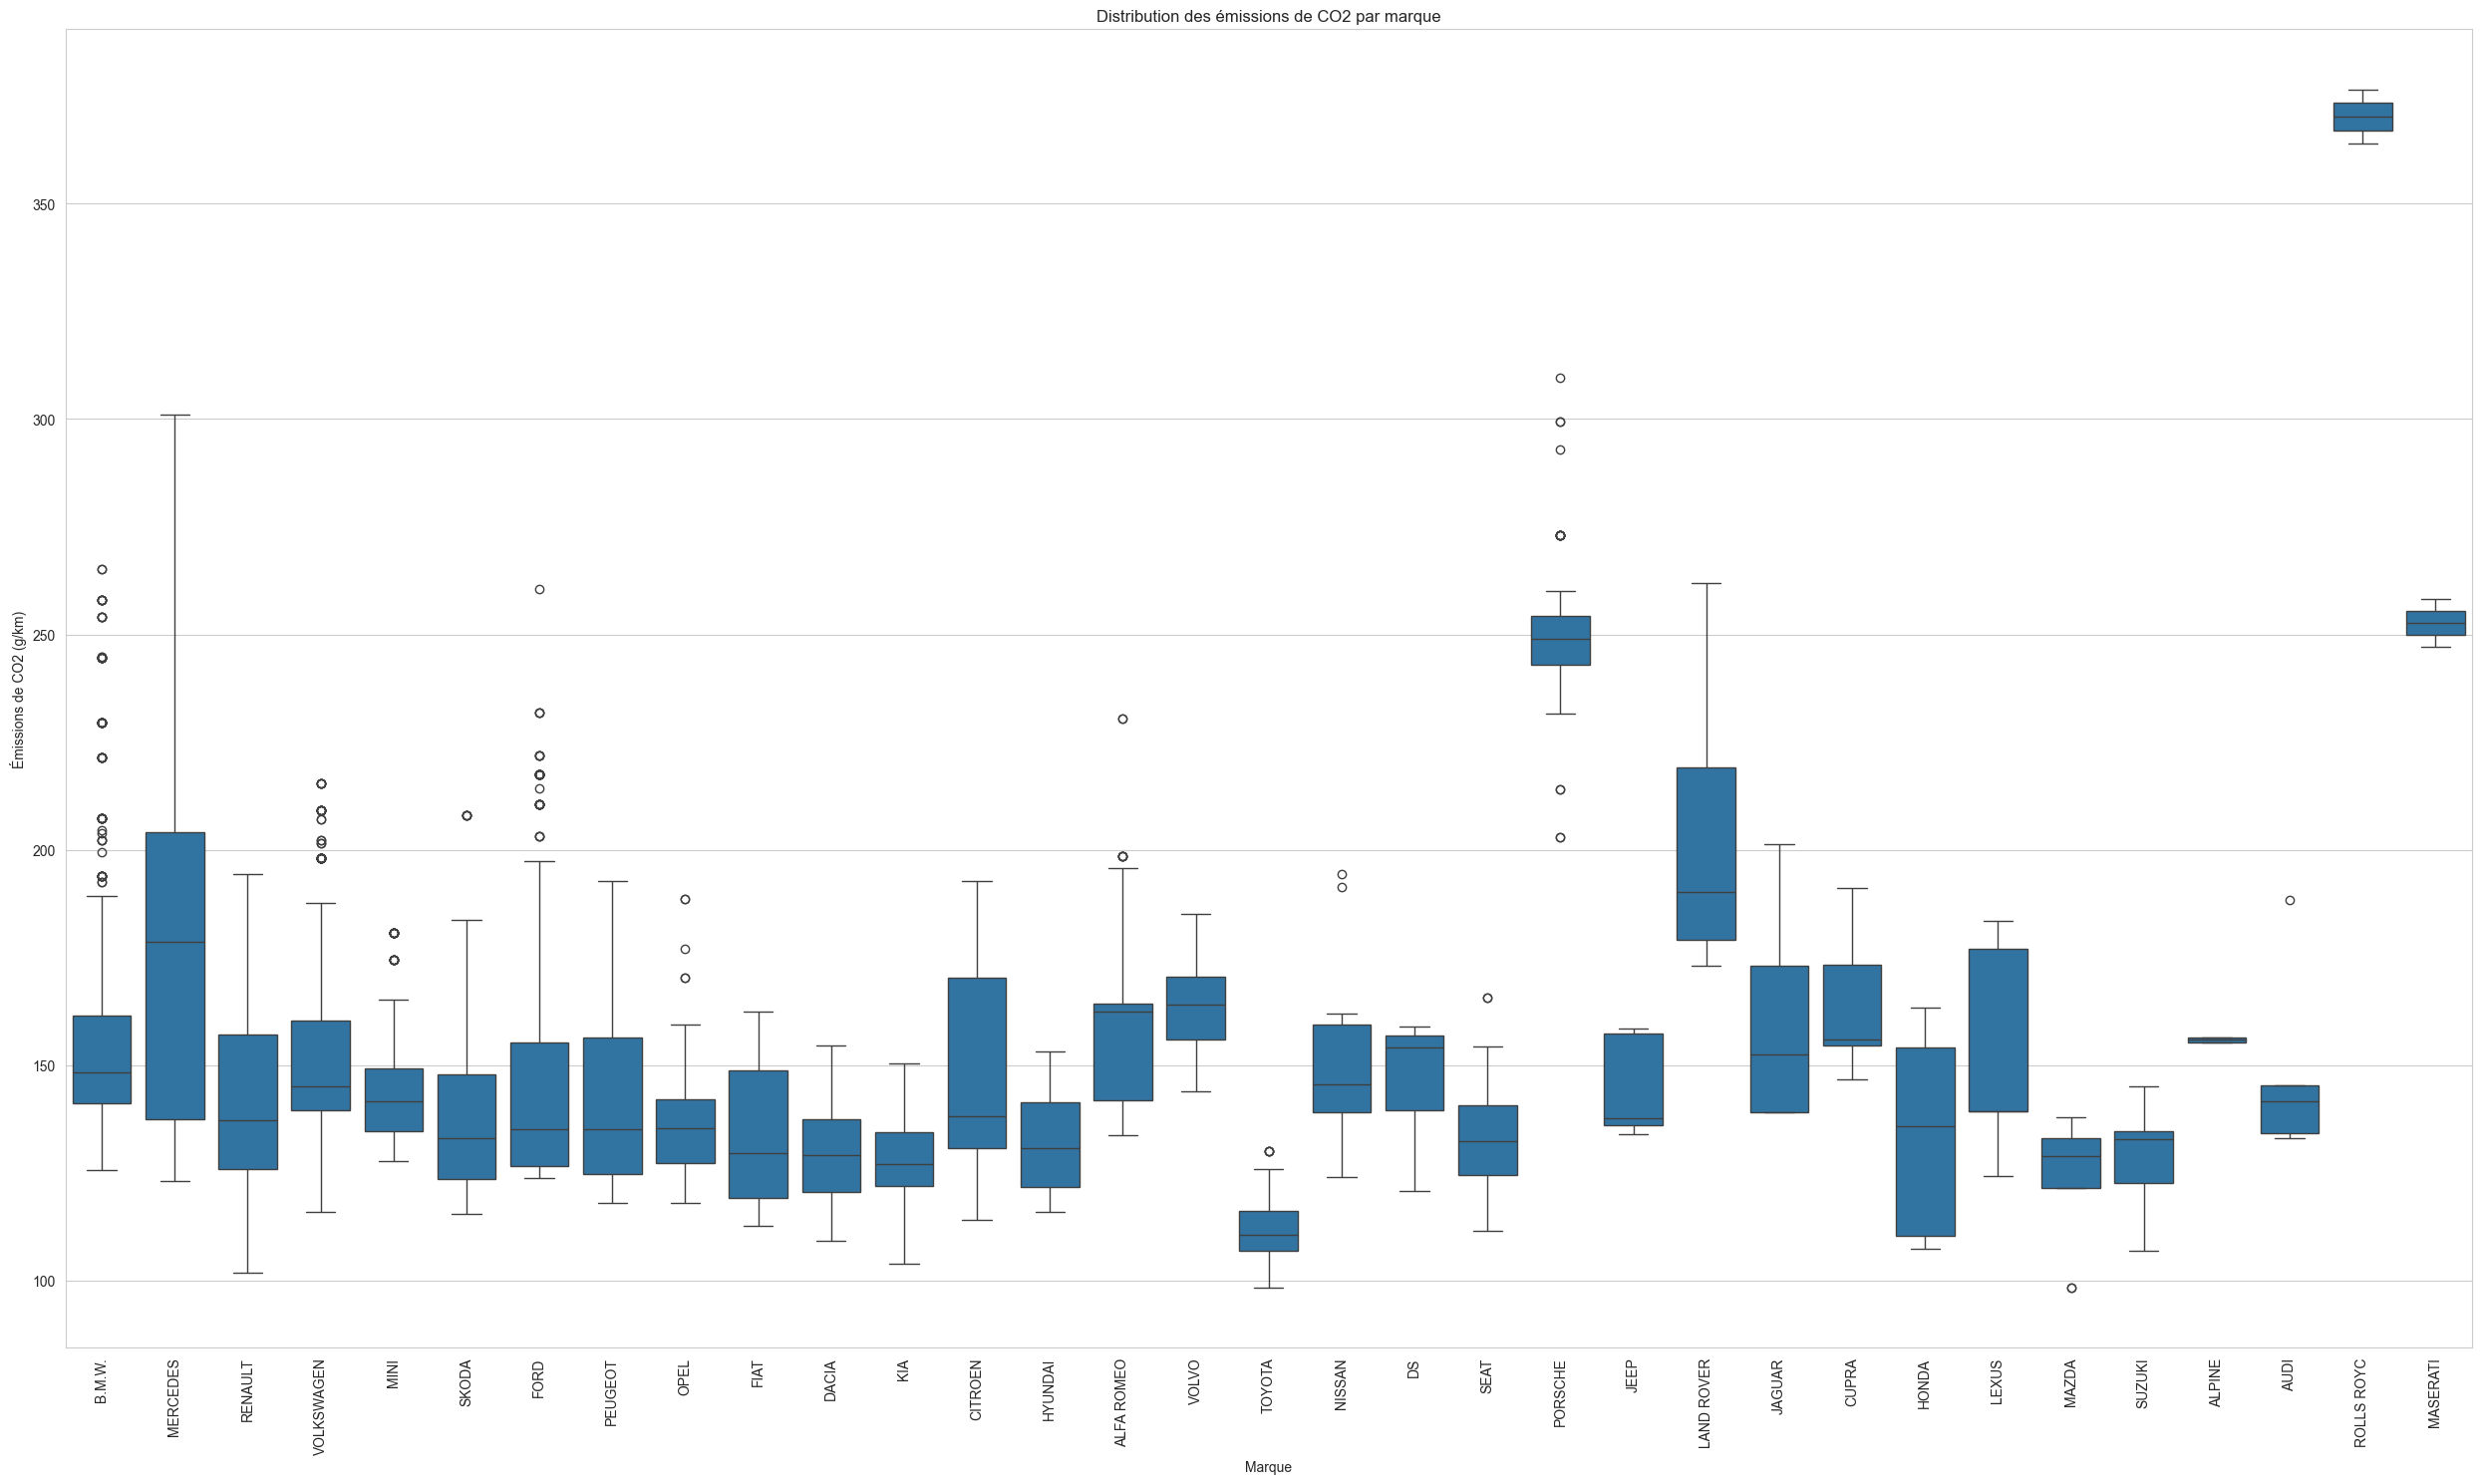

In [ ]:
# Plot boxplots for CO2 emissions for all brands
plt.figure(figsize=(25, 15))
sns.boxplot(x='Marque', y='CO2 vitesse mixte Avg', data=data, order=data['Marque'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution des émissions de CO2 par marque')
plt.xlabel('Marque')
plt.ylabel('Émissions de CO2 (g/km)')
plt.tight_layout()
plt.show()



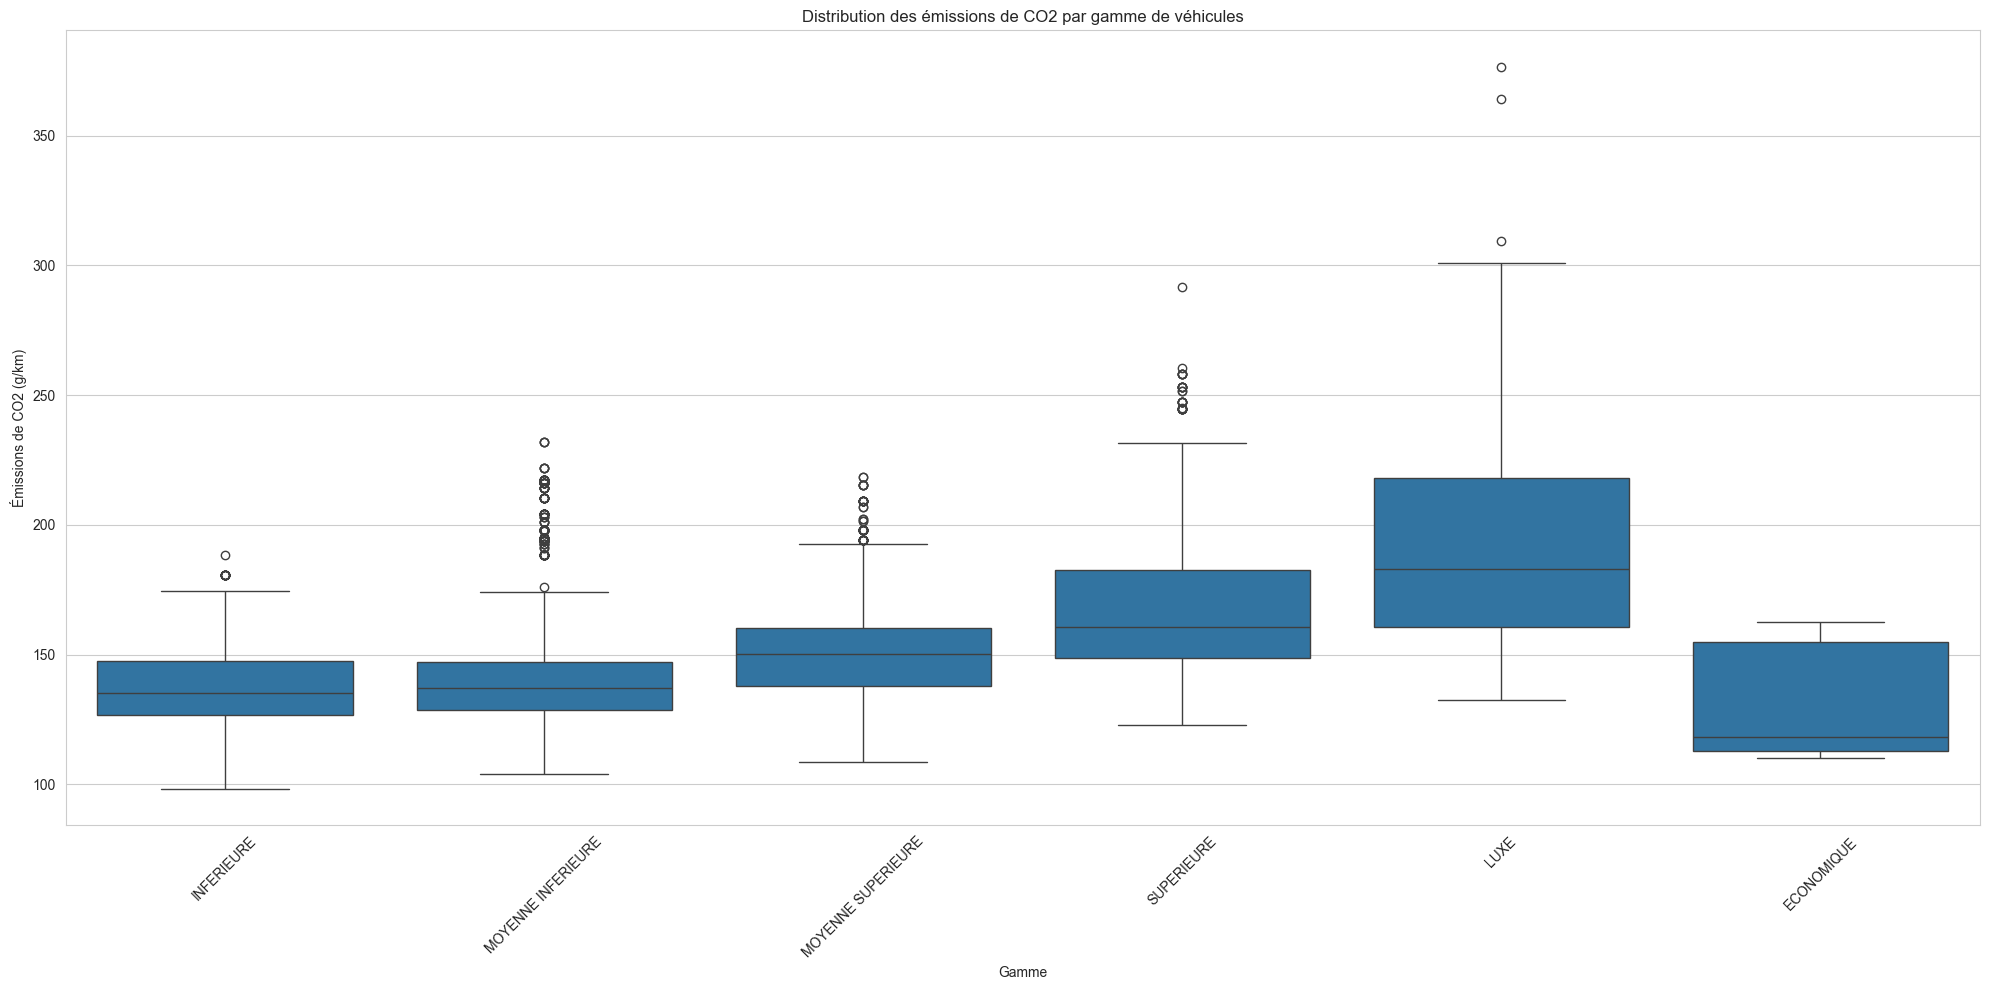

In [ ]:
# Plot boxplots for CO2 emissions per vehicle range ("Gamme")
plt.figure(figsize=(20, 10))
sns.boxplot(x='Gamme', y='CO2 vitesse mixte Avg', data=data, order=data['Gamme'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution des émissions de CO2 par gamme de véhicules')
plt.xlabel('Gamme')
plt.ylabel('Émissions de CO2 (g/km)')
plt.tight_layout()
plt.show()


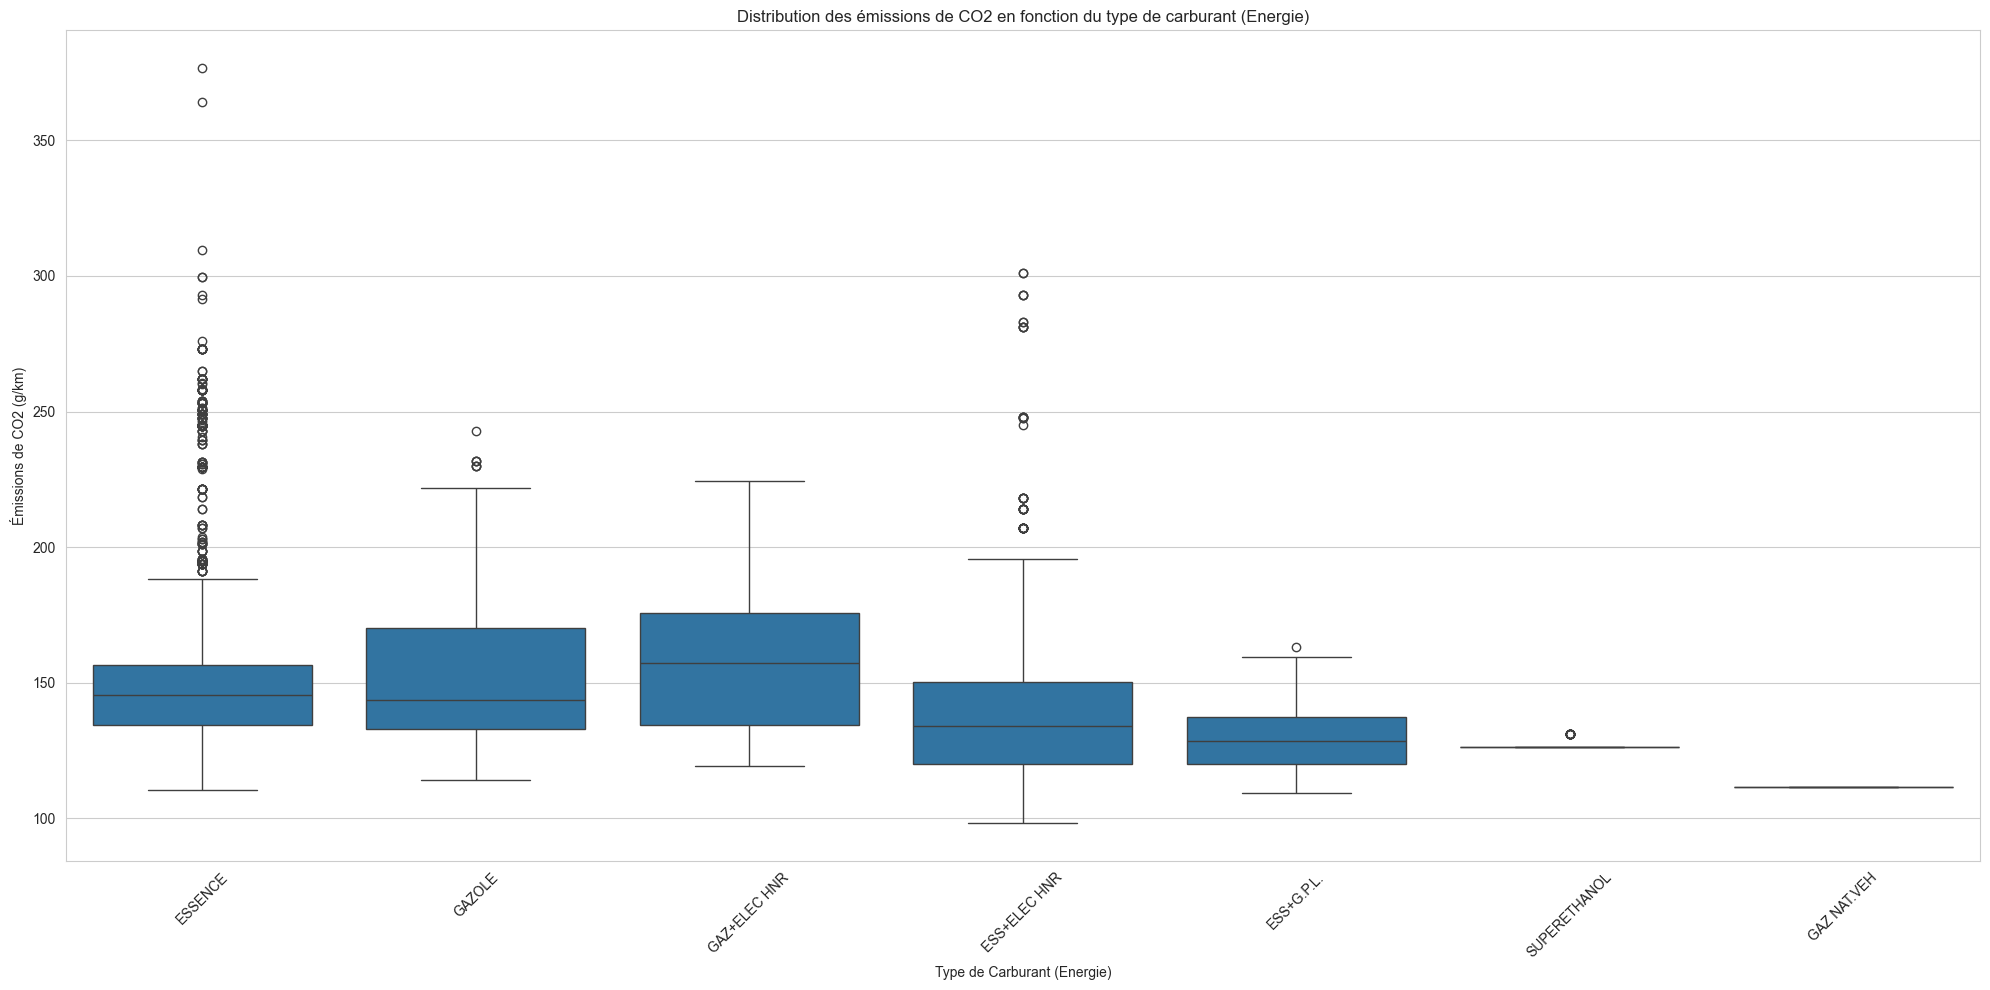

In [ ]:
# Plot boxplots for CO2 emissions based on fuel type ("Energie")
plt.figure(figsize=(20, 10))
sns.boxplot(x='Energie', y='CO2 vitesse mixte Avg', data=data, order=data['Energie'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution des émissions de CO2 en fonction du type de carburant (Energie)')
plt.xlabel('Type de Carburant (Energie)')
plt.ylabel('Émissions de CO2 (g/km)')
plt.tight_layout()
plt.show()


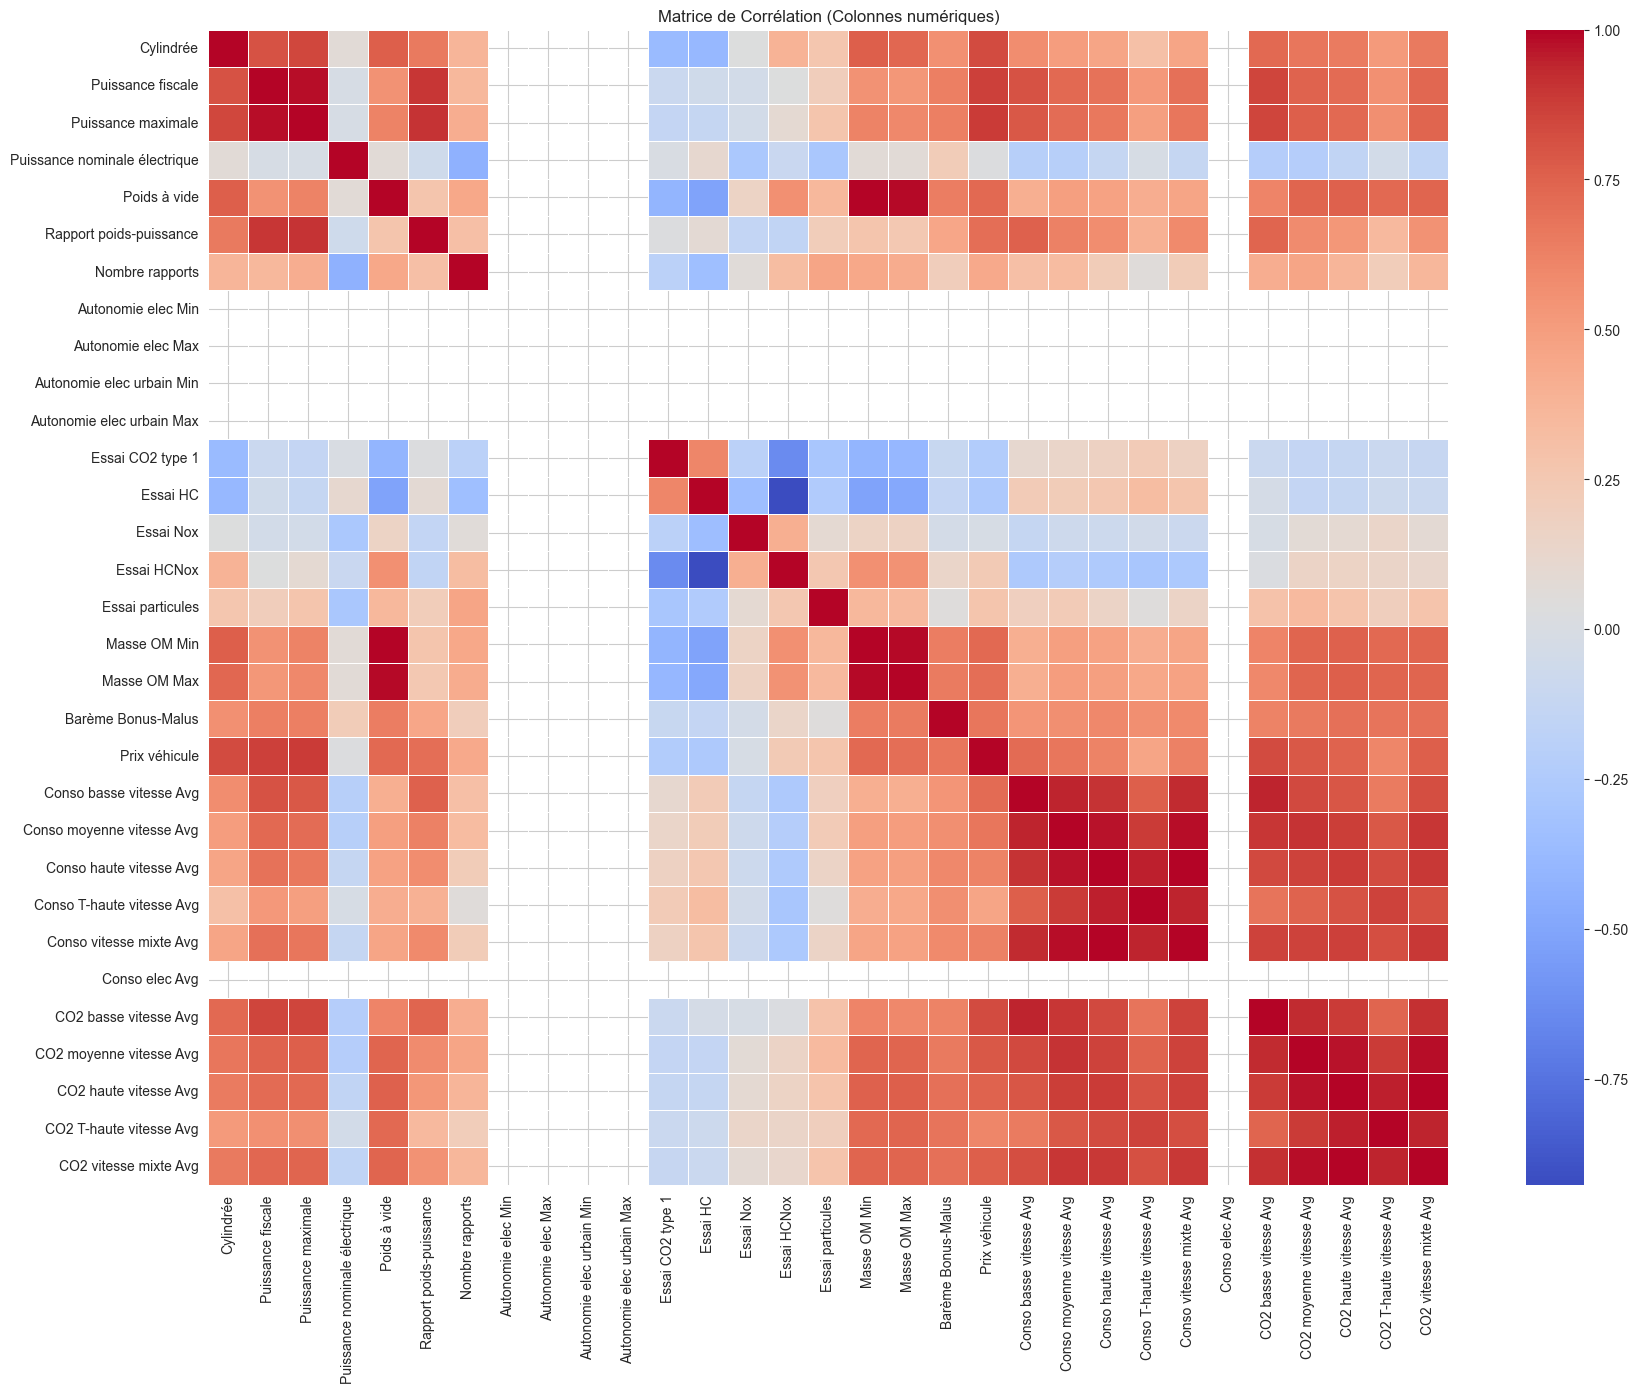

In [ ]:
# Sélection des colonnes numériques
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation pour les colonnes numériques
numeric_correlation_matrix = numeric_data.corr()

# Affichage de la heatmap de la matrice de corrélation pour les colonnes numériques
plt.figure(figsize=(20, 15))
sns.heatmap(numeric_correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Matrice de Corrélation (Colonnes numériques)')
plt.show()



## Autour de poids

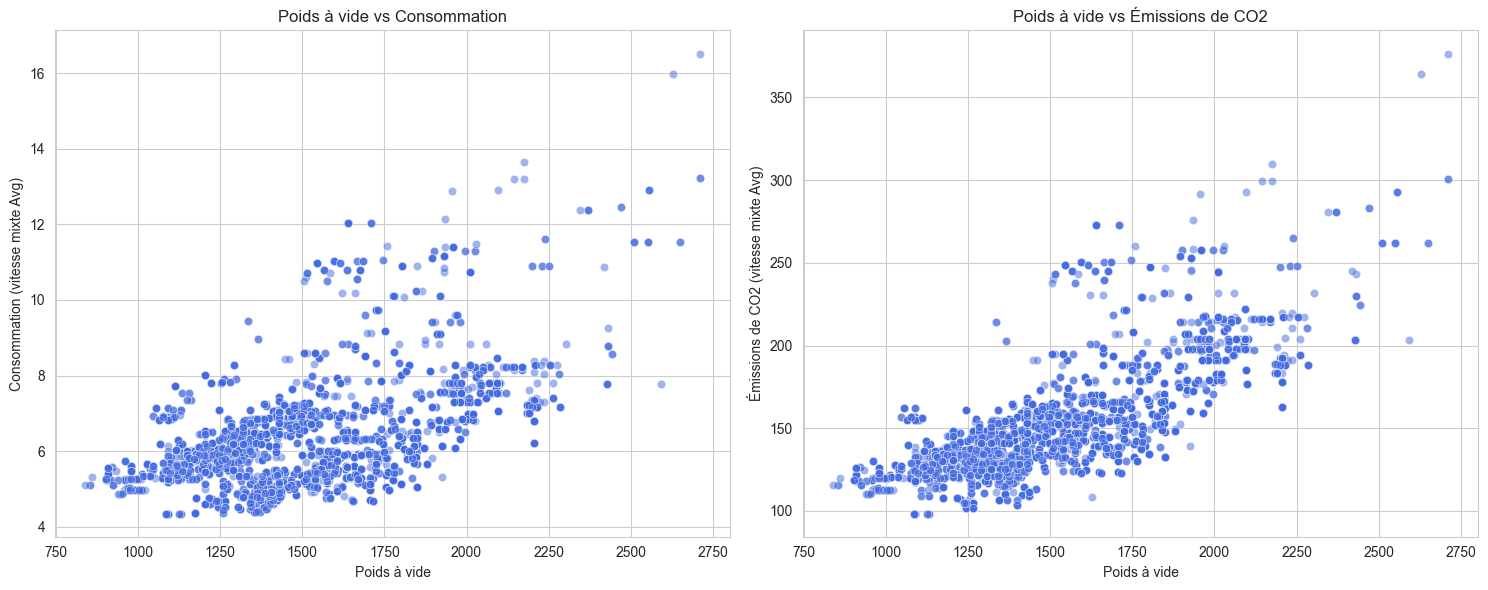

In [ ]:
# Configuration de la taille des graphiques
plt.figure(figsize=(15, 6))

# Graphique de dispersion pour Poids à vide vs Consommation
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['Poids à vide'], y=data['Conso vitesse mixte Avg'], color='royalblue', alpha=0.5)
plt.title('Poids à vide vs Consommation')
plt.xlabel('Poids à vide')
plt.ylabel('Consommation (vitesse mixte Avg)')

# Graphique de dispersion pour Poids à vide vs Émissions de CO2
plt.subplot(1, 2, 2)
sns.scatterplot(x=data['Poids à vide'], y=data['CO2 vitesse mixte Avg'], color='royalblue', alpha=0.5)
plt.title('Poids à vide vs Émissions de CO2')
plt.xlabel('Poids à vide')
plt.ylabel('Émissions de CO2 (vitesse mixte Avg)')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()
plt.show()


In [ ]:
!pip install sklearn
!pip install scikit-learn

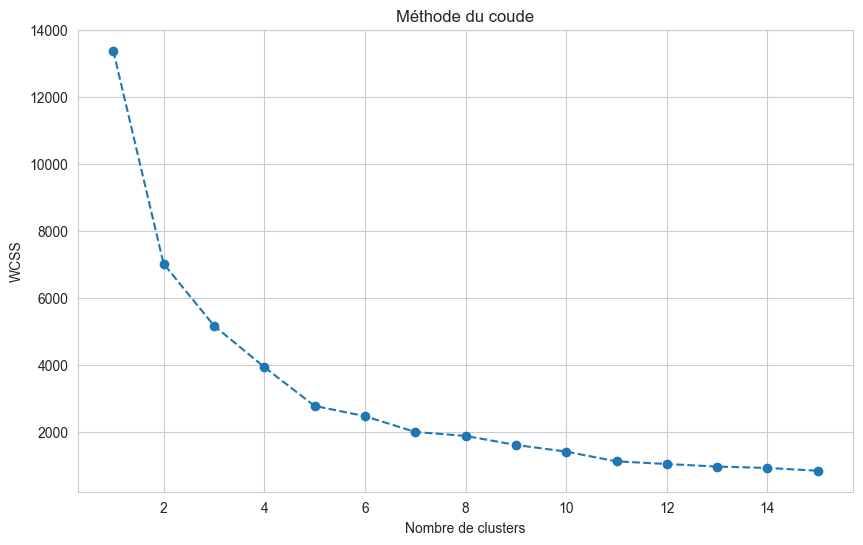

In [137]:
#Méthode du coude pour clustering

# Calcul de la somme des carrés des distances intra-cluster pour différents k
wcss = []  # within-cluster sum of squares
max_clusters = 15

for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=1)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Tracer la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()


c:\Users\Hugo\Desktop\Data Science\Car_Conso\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hugo\Desktop\Data Science\Car_Conso\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


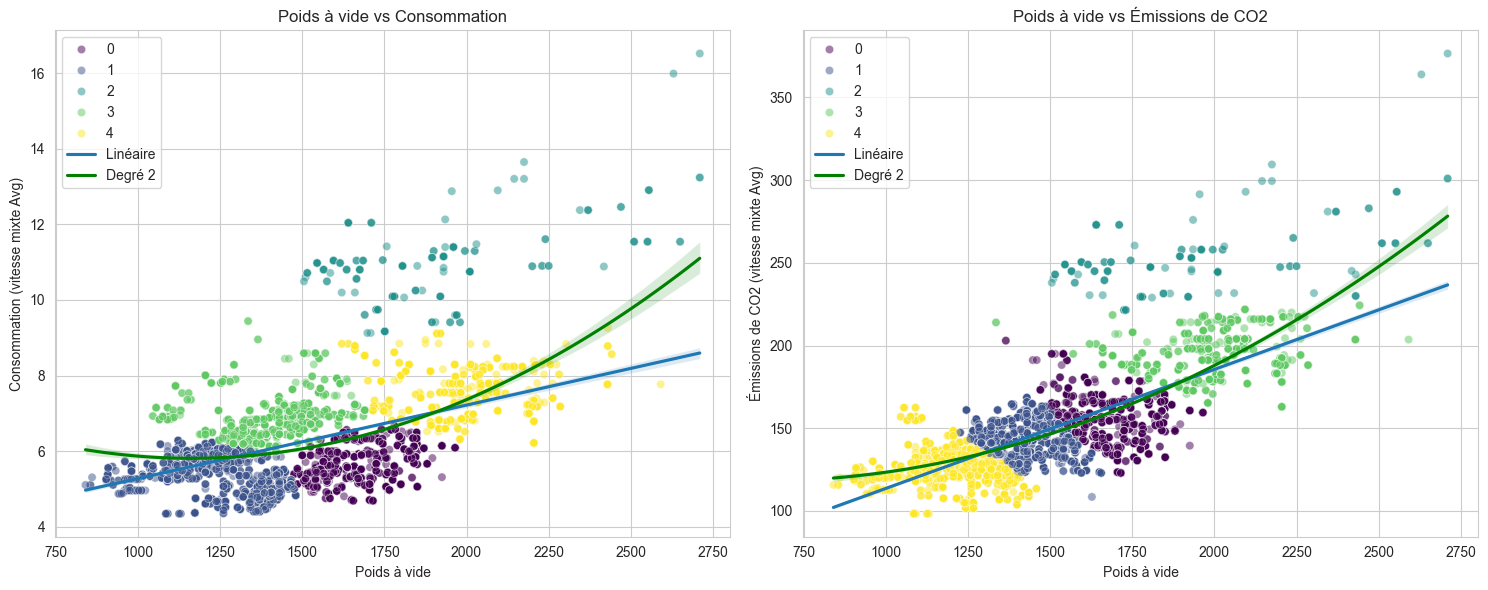

In [141]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Sélection des données pour le clustering
cluster_data = data[['Poids à vide', 'Conso vitesse mixte Avg']].dropna()

# Mise à l'échelle des données pour le clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Application de KMeans pour le clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Configuration de la taille des graphiques
plt.figure(figsize=(15, 6))

# Graphique de dispersion pour Poids à vide vs Consommation avec courbes de tendance et clustering
plt.subplot(1, 2, 1)
sns.scatterplot(x='Poids à vide', y='Conso vitesse mixte Avg', hue='Cluster', data=cluster_data, palette='viridis', alpha=0.5)
sns.regplot(x='Poids à vide', y='Conso vitesse mixte Avg', data=cluster_data, scatter=False, label='Linéaire')
sns.regplot(x='Poids à vide', y='Conso vitesse mixte Avg', data=cluster_data, scatter=False, order=2, label='Degré 2', color='green')
plt.title('Poids à vide vs Consommation')
plt.xlabel('Poids à vide')
plt.ylabel('Consommation (vitesse mixte Avg)')
plt.legend()

# Préparation des données pour le second graphique
cluster_data_2 = data[['Poids à vide', 'CO2 vitesse mixte Avg']].dropna()
scaled_data_2 = scaler.fit_transform(cluster_data_2)
cluster_data_2['Cluster'] = kmeans.fit_predict(scaled_data_2)

# Graphique de dispersion pour Poids à vide vs Émissions de CO2 avec courbes de tendance et clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x='Poids à vide', y='CO2 vitesse mixte Avg', hue='Cluster', data=cluster_data_2, palette='viridis', alpha=0.5)
sns.regplot(x='Poids à vide', y='CO2 vitesse mixte Avg', data=cluster_data_2, scatter=False, label='Linéaire')
sns.regplot(x='Poids à vide', y='CO2 vitesse mixte Avg', data=cluster_data_2, scatter=False, order=2, label='Degré 2', color='green')
plt.title('Poids à vide vs Émissions de CO2')
plt.xlabel('Poids à vide')
plt.ylabel('Émissions de CO2 (vitesse mixte Avg)')
plt.legend()

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()
plt.show()


## Autour du rapport poids-puissance

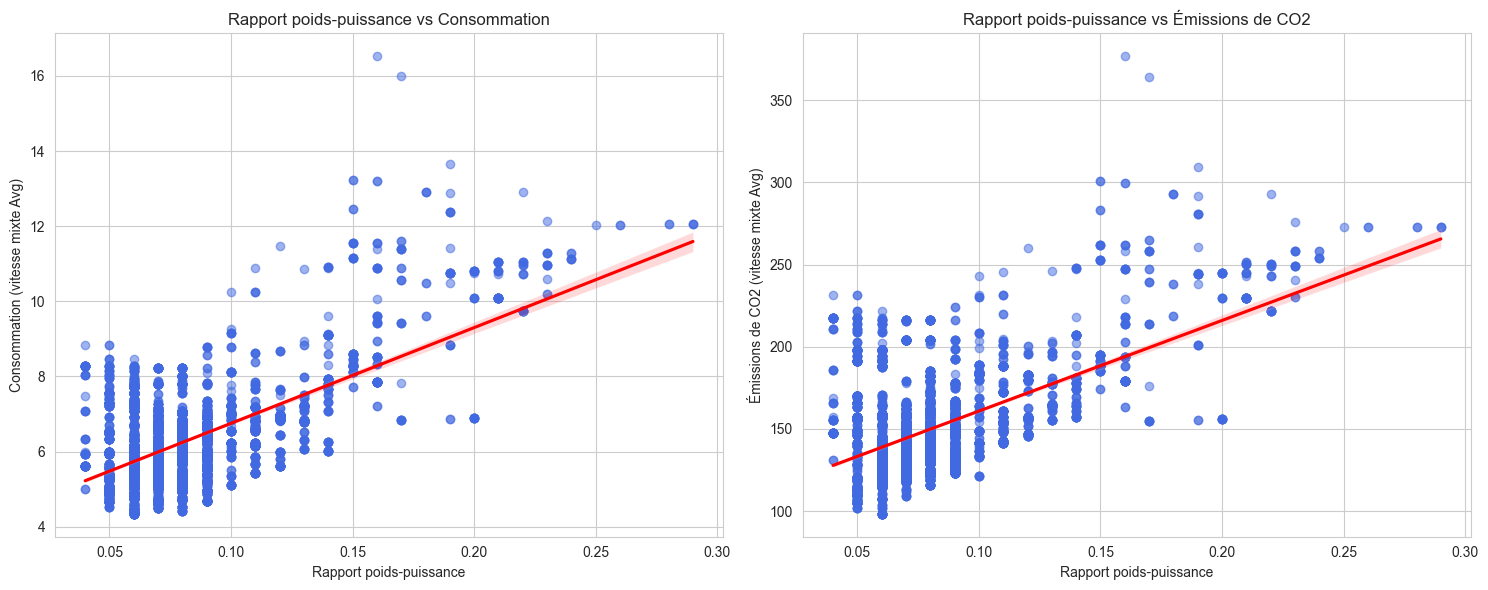

In [148]:
# Configuration de la taille des graphiques
plt.figure(figsize=(15, 6))

# Graphique de dispersion avec droite de régression pour Rapport poids-puissance vs Consommation
plt.subplot(1, 2, 1)
sns.regplot(x=data['Rapport poids-puissance'], y=data['Conso vitesse mixte Avg'], color='royalblue', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Rapport poids-puissance vs Consommation')
plt.xlabel('Rapport poids-puissance')
plt.ylabel('Consommation (vitesse mixte Avg)')

# Graphique de dispersion avec droite de régression pour Rapport poids-puissance vs Émissions de CO2
plt.subplot(1, 2, 2)
sns.regplot(x=data['Rapport poids-puissance'], y=data['CO2 vitesse mixte Avg'], color='royalblue', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Rapport poids-puissance vs Émissions de CO2')
plt.xlabel('Rapport poids-puissance')
plt.ylabel('Émissions de CO2 (vitesse mixte Avg)')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()
plt.show()


## Autour du prix

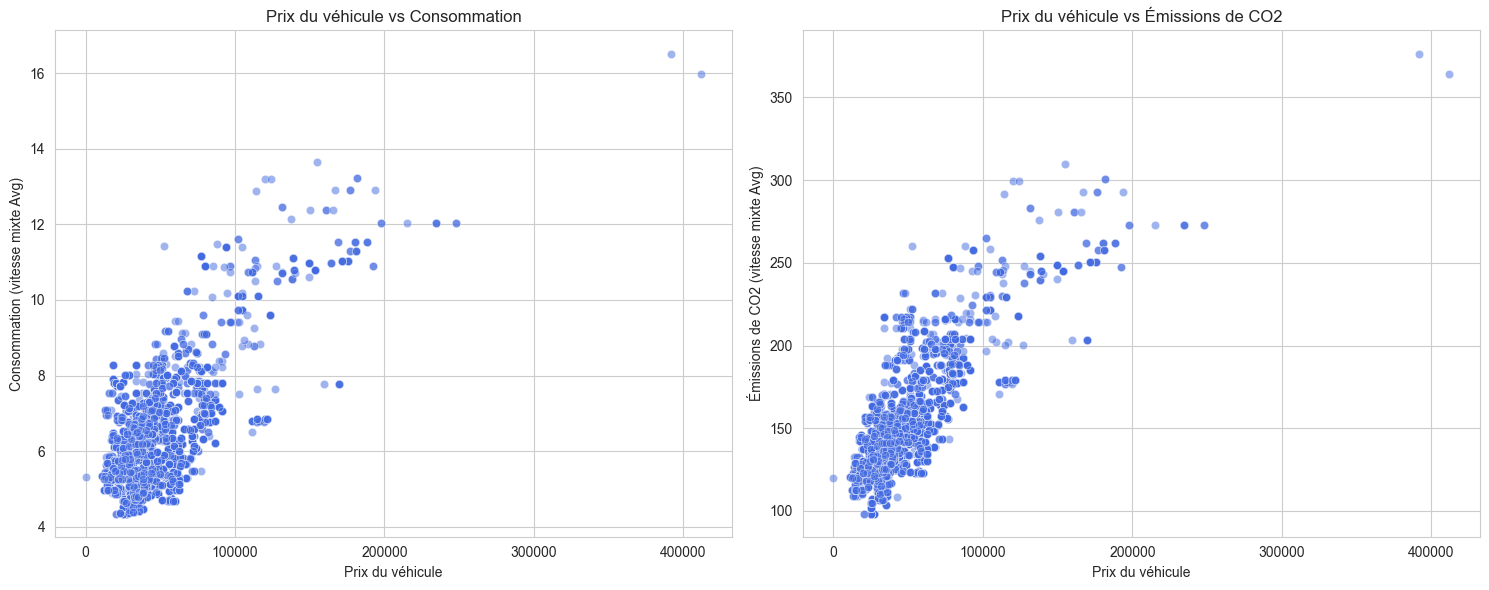

In [153]:
# Configuration de la taille des graphiques
plt.figure(figsize=(15, 6))

# Graphique de dispersion pour Prix du véhicule vs Consommation
plt.subplot(1, 2, 1)
sns.scatterplot(y=data['Conso vitesse mixte Avg'], x=data['Prix véhicule'], color='royalblue', alpha=0.5)
plt.title('Prix du véhicule vs Consommation')
plt.ylabel('Consommation (vitesse mixte Avg)')
plt.xlabel('Prix du véhicule')

# Graphique de dispersion pour Prix du véhicule vs Émissions de CO2
plt.subplot(1, 2, 2)
sns.scatterplot(x=data['Prix véhicule'], y=data['CO2 vitesse mixte Avg'], color='royalblue', alpha=0.5)
plt.title('Prix du véhicule vs Émissions de CO2')
plt.xlabel('Prix du véhicule')
plt.ylabel('Émissions de CO2 (vitesse mixte Avg)')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()
plt.show()




## Autour des particules

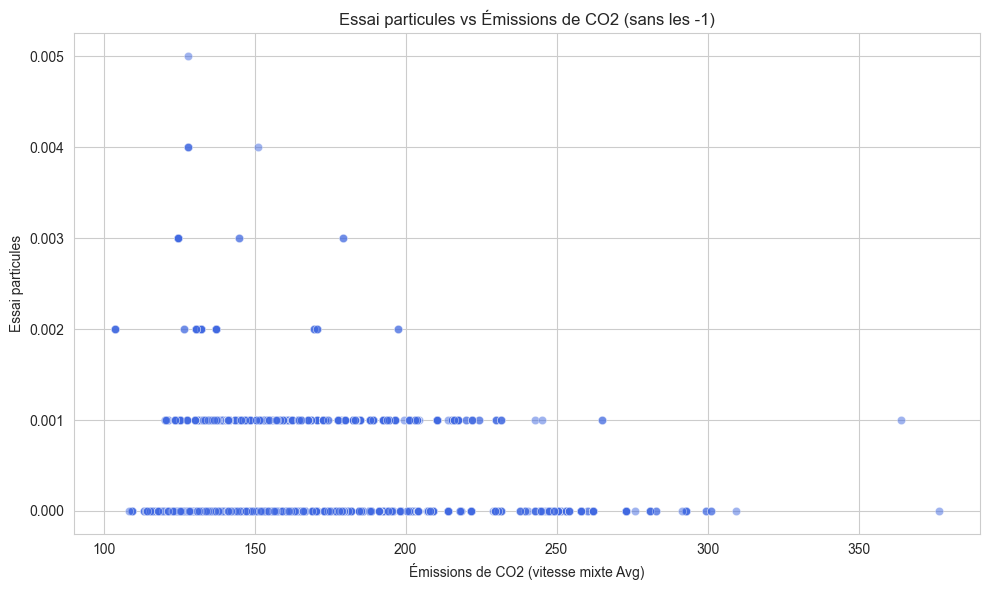

In [154]:
# Filtrage des données où "Essai particules" et "Émissions de CO2" ne sont pas égales à -1
filtered_data_particles = data[(data['Essai particules'] != -1) & (data['CO2 vitesse mixte Avg'] != -1)]

# Graphique de dispersion pour les données filtrées
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_data_particles['CO2 vitesse mixte Avg'], y=filtered_data_particles['Essai particules'], color='royalblue', alpha=0.5)
plt.title('Essai particules vs Émissions de CO2 (sans les -1)')
plt.xlabel('Émissions de CO2 (vitesse mixte Avg)')
plt.ylabel('Essai particules')
plt.tight_layout()
plt.show()


In [161]:
# Palmarès des 10 meilleurs véhicules essence en fonction de leurs émissions de CO2
top_10_essence = data[data['Energie'] == 'ESSENCE'].sort_values(by='CO2 vitesse mixte Avg', ascending=True).head(10)

# Palmarès des 10 meilleurs véhicules diesel en fonction de leurs émissions de CO2
top_10_diesel = data[data['Energie'] == 'GAZOLE'].sort_values(by='CO2 vitesse mixte Avg', ascending=True).head(10)

# Palmarès des 10 meilleurs véhicules en fonction de leurs émissions de CO2 par gamme
top_10_gamme = data.groupby('Gamme').apply(lambda x: x.sort_values(by='CO2 vitesse mixte Avg', ascending=True).head(10))

# Top 10 des pires véhicules essence
bottom_10_essence = data[data['Energie'] == 'Essence'].sort_values(by='CO2 vitesse mixte Avg', ascending=False).head(10)

top_10_essence[['Marque', 'Modèle', 'CO2 vitesse mixte Avg']], top_10_diesel[['Marque', 'Modèle', 'CO2 vitesse mixte Avg']], top_10_gamme[['Marque', 'Modèle', 'Gamme', 'CO2 vitesse mixte Avg']], bottom_10_essence[['Marque', 'Modèle', 'CO2 vitesse mixte Avg']]


(      Marque  Modèle  CO2 vitesse mixte Avg
 3622  TOYOTA  AYGO X                110.325
 1882  TOYOTA  AYGO X                110.325
 2149  TOYOTA  AYGO X                110.325
 6474  TOYOTA  AYGO X                110.325
 5763  TOYOTA  AYGO X                110.815
 3379  TOYOTA  AYGO X                113.455
 4582  TOYOTA  AYGO X                113.455
 5652  TOYOTA  AYGO X                113.455
 558   TOYOTA  AYGO X                113.455
 4526  TOYOTA  AYGO X                113.840,
        Marque Modèle  CO2 vitesse mixte Avg
 6083  CITROEN     C4                114.000
 4247  CITROEN     C4                114.000
 2390  RENAULT   CLIO                114.455
 1409  RENAULT   CLIO                114.455
 1328  RENAULT   CLIO                114.455
 2375  RENAULT   CLIO                114.455
 1108  RENAULT   CLIO                114.455
 372   RENAULT   CLIO                114.455
 5767  RENAULT   CLIO                114.455
 1103  RENAULT   CLIO                114.455,
        

In [158]:
# Suppression des doublons en fonction de caractéristiques clés (en supposant que la combinaison de Marque, Modèle, et Version est unique pour chaque véhicule)
unique_data = data.drop_duplicates(subset=['Marque', 'Modèle', 'Version'])

# Sélection des 10 meilleurs véhicules diesel en fonction de leurs émissions de CO2
top_10_diesel_unique = unique_data[unique_data['Energie'] == 'GAZOLE'].sort_values(by='CO2 vitesse mixte Avg', ascending=True).head(10)
top_10_diesel_unique[['Marque', 'Modèle', 'Version', 'CO2 vitesse mixte Avg']]


KeyError: Index(['Version'], dtype='object')